In [75]:
import pandas as pd
import matplotlib.pyplot as plt

In [24]:
df = pd.read_csv('yt_labeled.csv')

In [25]:
df.shape

(129188, 33)

In [26]:
df.columns

Index(['channel_id', 'channel_name', 'video_id', 'video_title',
       'video_creation_time', 'video_description', 'video_tags',
       'video_viewcount', 'video_likecount', 'video_commentcount',
       'comment_id', 'comment_author_id', 'comment_text', 'comment_time',
       'comment_likecount', 'comment_replycount', 'genre', 'cleaned_comment',
       'tokenized_comment', 'toxicity', 'severe_toxicity', 'identity_attack',
       'insult', 'profanity', 'threat', 'neg', 'neu', 'pos', 'compound',
       'polarity', 'subjectivity', 'negative_emotion', 'positive_emotion'],
      dtype='object')

In [27]:
simple_df = df[['channel_name','video_title', 'video_creation_time', 
                'video_viewcount','video_likecount', 'video_commentcount','comment_time',
       'comment_likecount', 'comment_replycount', 'genre', 'cleaned_comment',
       'tokenized_comment', 'toxicity', 'severe_toxicity', 'identity_attack',
       'insult', 'profanity', 'threat', 'neg', 'neu', 'pos', 'compound',
       'polarity', 'subjectivity', 'negative_emotion', 'positive_emotion']]

In [29]:
all_games = [
    "call of duty", "gta", "the last of us", "god of war", "batman", 
    "red dead redemption", "assassin's creed", "star wars jedi", 
    "resident evil", "cyberpunk", "fallout", "tomb raider", "elden ring",
    "minecraft", "pokemon go", "just dance", "it takes two", "uncharted",
    "brawl stars"]

In [40]:
simple_df['video_title_lower'] = simple_df['video_title'].str.lower()
simple_df['game'] = simple_df['video_title_lower'].apply(lambda title: ', '.join([keyword for keyword in all_games if keyword in title]))
simple_df.drop(columns=['video_title_lower'], inplace=True)

/var/folders/_1/f4gv917x3jv_z8t21wgjlcrw0000gn/T/ipykernel_14448/3244421465.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  simple_df['video_title_lower'] = simple_df['video_title'].str.lower()
/var/folders/_1/f4gv917x3jv_z8t21wgjlcrw0000gn/T/ipykernel_14448/3244421465.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  simple_df['game'] = simple_df['video_title_lower'].apply(lambda title: ', '.join([keyword for keyword in all_games if keyword in title]))
/var/folders/_1/f4gv917x3jv_z8t21wgjlcrw0000gn/T

In [60]:
simple_df.head(2)

,channel_name,video_title,video_creation_time,video_viewcount,video_likecount,video_commentcount,comment_time,comment_likecount,comment_replycount,genre,cleaned_comment,tokenized_comment,toxicity,severe_toxicity,identity_attack,insult,profanity,threat,neg,neu,pos,compound,polarity,subjectivity,negative_emotion,positive_emotion,game
0,PewDiePie,I t̶r̶i̶e̶d̶ ̶t̶o̶ beat Elden Ring Without Dyi...,2022-04-30 16:40:18+00:00,11533976,472939,15131,2024-02-19 02:42:05+00:00,0,0,action,bro sucks wish could share drink man,"['bro', 'sucks', 'wish', 'could', 'share', 'dr...",0.717606,0.197615,0.066587,0.486277,0.591665,0.012544,0.219,0.351,0.43,0.34,0.3,0.3,0.0,0.142857,elden ring
1,PewDiePie,I t̶r̶i̶e̶d̶ ̶t̶o̶ beat Elden Ring Without Dyi...,2022-04-30 16:40:18+00:00,11533976,472939,15131,2024-02-18 09:28:23+00:00,0,0,action,comment section title elden ring youtube gave ...,"['comment', 'section', 'title', 'elden', 'ring...",0.151034,0.007553,0.017867,0.026316,0.064959,0.025099,0.000,1.000,0.00,0.00,0.0,0.0,0.0,0.000000,elden ring


In [70]:
sentiment_measures = ['toxicity','severe_toxicity', 'identity_attack','insult', 'profanity', 'threat', 'neg', 'neu', 'pos', 'compound', 'polarity', 'subjectivity','negative_emotion', 'positive_emotion']

## Toxicity by Game  

In [63]:
game_toxicity = simple_df.groupby('game').mean().sort_values(by = 'toxicity', ascending=False)

/var/folders/_1/f4gv917x3jv_z8t21wgjlcrw0000gn/T/ipykernel_14448/1306543767.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  game_toxicity = simple_df.groupby('game').mean().sort_values(by = 'toxicity', ascending=False)


Text(0.5, 1.0, 'Toxicity Scores of Video Games')

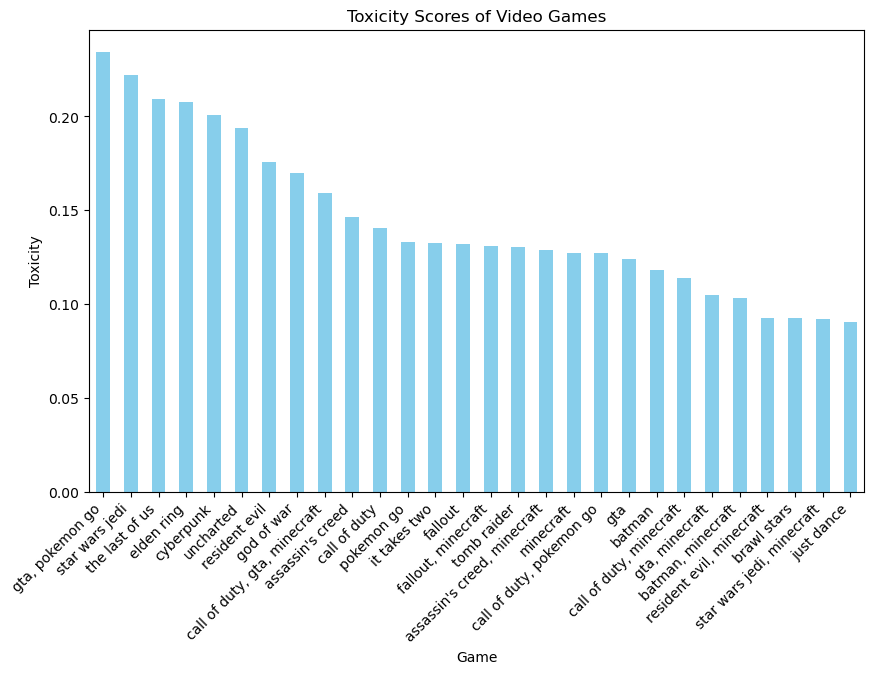

In [87]:
game_toxicity_plot = game_toxicity['toxicity']

plt.figure(figsize = (10, 6))
ax = game_toxicity_plot.plot(kind='bar', color='skyblue')
# Adding labels and title
plt.xlabel('Game')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right') 
plt.ylabel('Toxicity')
plt.title('Toxicity Scores of Video Games')

In [88]:
# simple_df.groupby(['genre','game']).mean()

## Toxicity by Channel

In [89]:
channel_toxicity = simple_df.groupby('channel_name').mean().sort_values(by = 'toxicity', ascending=False)

/var/folders/_1/f4gv917x3jv_z8t21wgjlcrw0000gn/T/ipykernel_14448/3060847350.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  channel_toxicity = simple_df.groupby('channel_name').mean().sort_values(by = 'toxicity', ascending=False)


Text(0.5, 1.0, 'Toxicity Scores by YouTuber')

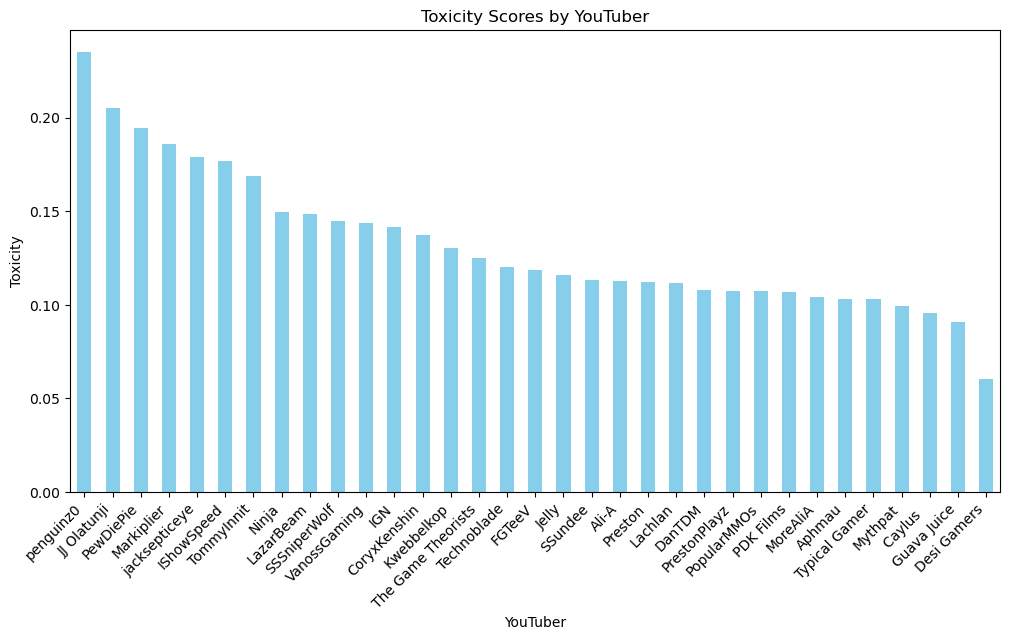

In [91]:
channel_toxicity_plot = channel_toxicity['toxicity']

plt.figure(figsize = (12, 6))
ax = channel_toxicity_plot.plot(kind='bar', color='skyblue')
# Adding labels and title
plt.xlabel('YouTuber')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right') 
plt.ylabel('Toxicity')
plt.title('Toxicity Scores by YouTuber')

## Investigating Why different YouTuber has different Toxicity Means?

In [158]:
# Pivot to calculate unique count of video titles for each channel and genre
count_vid_by_channel_genre = simple_df.pivot_table(index='channel_name', columns='genre', values='video_title', aggfunc='nunique', fill_value=0).reset_index()

# Rename columns for clarity
count_vid_by_channel_genre.rename(columns={'action': 'action_count', 'non-action': 'non_action_count'}, inplace=True)

In [159]:
count_vid_by_channel_genre.head(3)

genre,channel_name,action_count,non_action_count
0,Ali-A,29,9
1,Aphmau,1,30
2,Caylus,29,30


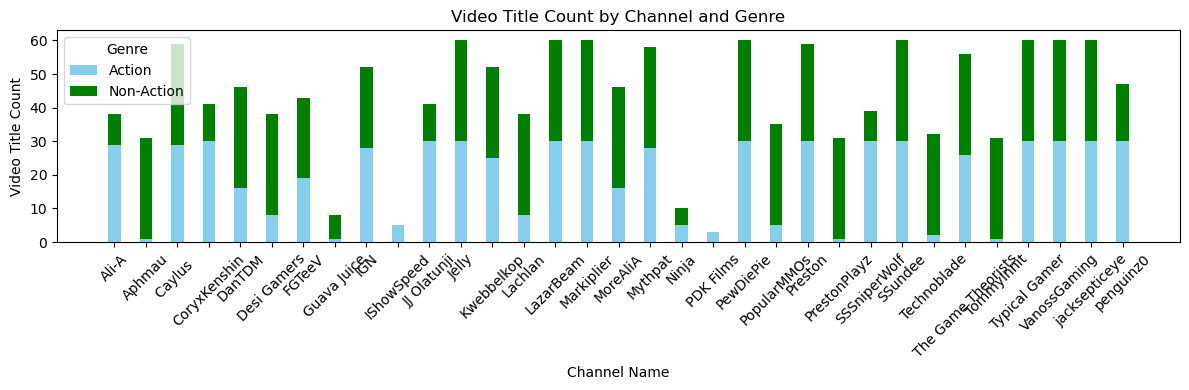

In [160]:
plt.figure(figsize=(12, 4))

# Plot action counts
plt.bar(count_vid_by_channel_genre['channel_name'], count_vid_by_channel_genre['action_count'], color='skyblue', width=0.4, label='Action')

# Plot non-action counts
plt.bar(count_vid_by_channel_genre['channel_name'], count_vid_by_channel_genre['non_action_count'], color='green', width=0.4, label='Non-Action', bottom = count_vid_by_channel_genre['action_count'])

# Adding labels and title
plt.xlabel('Channel Name')
plt.ylabel('Video Title Count')
plt.title('Video Title Count by Channel and Genre')
plt.legend(title='Genre')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [161]:
count_vid_by_channel_genre['action_video_%'] = round(100*(count_vid_by_channel_genre['action_count']/(count_vid_by_channel_genre['action_count']+ count_vid_by_channel_genre['non_action_count'])),2)

In [162]:
count_vid_by_channel_genre = count_vid_by_channel_genre.merge(channel_toxicity['toxicity'], left_on= 'channel_name', right_index=True,how = 'left')

In [164]:
count_vid_by_channel_genre.sort_values(by = 'action_video_%', ascending = False)

,channel_name,action_count,non_action_count,action_video_%,toxicity
9,IShowSpeed,5,0,100.00,0.176740
19,PDK Films,3,0,100.00,0.107076
24,SSSniperWolf,30,9,76.92,0.144722
0,Ali-A,29,9,76.32,0.112603
3,CoryxKenshin,30,11,73.17,0.137465
10,JJ Olatunji,30,11,73.17,0.204891
32,penguinz0,30,17,63.83,0.235044
8,IGN,28,24,53.85,0.141533
22,Preston,30,29,50.85,0.112248
20,PewDiePie,30,30,50.00,0.194216
